# Predictive modeling
This file is aiming at finding the optimum algorithm for house price prediction.  
Different algorithms will be utilized and tested.

## Data Analysis
First of all, import the data and analyze its characteristics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/Processed_data.csv")

In [3]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,Address,Latitude,Longitude,Year,Month
0,2014-05-02,313000,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,18810 Densmore Ave N Shoreline WA 98133 USA,47.765784,-122.338860,2014,5
1,2014-05-02,2384000,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,Seattle,WA 98119,USA,709 W Blaine St Seattle WA 98119 USA,47.634528,-122.366896,2014,5
2,2014-05-02,342000,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,26206-26214 143rd Ave SE Kent WA 98042 USA,47.367389,-122.150525,2014,5
3,2014-05-02,420000,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,857 170th Pl NE Bellevue WA 98008 USA,47.618727,-122.113859,2014,5
4,2014-05-02,550000,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,9105 170th Ave NE Redmond WA 98052 USA,47.683072,-122.113971,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3.0,1.75,1510,6360,1.0,0,0,4,...,1979,501 N 143rd St,Seattle,WA 98133,USA,501 N 143rd St Seattle WA 98133 USA,47.732048,-122.352864,2014,7
4596,2014-07-09,534333,3.0,2.50,1460,7573,2.0,0,0,3,...,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,14855 SE 10th Pl Bellevue WA 98007 USA,47.601195,-122.141083,2014,7
4597,2014-07-09,416904,3.0,2.50,3010,7014,2.0,0,0,3,...,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,759 Ilwaco Pl NE Renton WA 98059 USA,47.494972,-122.149350,2014,7
4598,2014-07-10,203400,4.0,2.00,2090,6630,1.0,0,0,3,...,0,5148 S Creston St,Seattle,WA 98178,USA,5148 S Creston St Seattle WA 98178 USA,47.507109,-122.267937,2014,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   int64  
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
 18  Address 

In [5]:
data_backup = data.copy()
data_backup.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,Address,Latitude,Longitude,Year,Month
0,2014-05-02,313000,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,18810 Densmore Ave N Shoreline WA 98133 USA,47.765784,-122.338860,2014,5
1,2014-05-02,2384000,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,Seattle,WA 98119,USA,709 W Blaine St Seattle WA 98119 USA,47.634528,-122.366896,2014,5
2,2014-05-02,342000,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,26206-26214 143rd Ave SE Kent WA 98042 USA,47.367389,-122.150525,2014,5
3,2014-05-02,420000,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,857 170th Pl NE Bellevue WA 98008 USA,47.618727,-122.113859,2014,5
4,2014-05-02,550000,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,9105 170th Ave NE Redmond WA 98052 USA,47.683072,-122.113971,2014,5


In [6]:
# Unit conversion
data['price'] = data['price']/1000
data['price'].astype(int)
data.rename(columns={'price':'price(1000$)'}, inplace=True)

columns_to_convert = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for col in columns_to_convert:
    data[col] = data[col] * 0.093
data.rename(columns={'sqft_living':'sqm_living', 'sqft_lot':'sqm_lot', 'sqft_above':'sqm_above', 'sqft_basement':'sqm_basement'}, inplace=True)

data['yr_built'] = 2014 - data['yr_built']

rows = data.shape[0]
for i in range(rows):
    if data.loc[i, 'yr_renovated'] == 0: 
        data.loc[i, 'yr_renovated'] = data.loc[i, 'yr_built']
    else:
        data.loc[i, 'yr_renovated'] = 2014 - data.loc[i, 'yr_renovated']
data.head()

,date,price(1000$),bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,Address,Latitude,Longitude,Year,Month
0,2014-05-02,313.0,3.0,1.50,124.62,735.816,1.5,0,0,3,...,9,18810 Densmore Ave N,Shoreline,WA 98133,USA,18810 Densmore Ave N Shoreline WA 98133 USA,47.765784,-122.338860,2014,5
1,2014-05-02,2384.0,5.0,2.50,339.45,841.650,2.0,0,4,5,...,93,709 W Blaine St,Seattle,WA 98119,USA,709 W Blaine St Seattle WA 98119 USA,47.634528,-122.366896,2014,5
2,2014-05-02,342.0,3.0,2.00,179.49,1111.071,1.0,0,0,4,...,48,26206-26214 143rd Ave SE,Kent,WA 98042,USA,26206-26214 143rd Ave SE Kent WA 98042 USA,47.367389,-122.150525,2014,5
3,2014-05-02,420.0,3.0,2.25,186.00,746.790,1.0,0,0,4,...,51,857 170th Pl NE,Bellevue,WA 98008,USA,857 170th Pl NE Bellevue WA 98008 USA,47.618727,-122.113859,2014,5
4,2014-05-02,550.0,4.0,2.50,180.42,976.500,1.0,0,0,4,...,22,9105 170th Ave NE,Redmond,WA 98052,USA,9105 170th Ave NE Redmond WA 98052 USA,47.683072,-122.113971,2014,5


In [7]:
# Delete unneeded columns
data.drop(['date', 'street', 'city', 'statezip', 'country',	'Address', 'Year'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price(1000$)  4600 non-null   float64
 1   bedrooms      4600 non-null   float64
 2   bathrooms     4600 non-null   float64
 3   sqm_living    4600 non-null   float64
 4   sqm_lot       4600 non-null   float64
 5   floors        4600 non-null   float64
 6   waterfront    4600 non-null   int64  
 7   view          4600 non-null   int64  
 8   condition     4600 non-null   int64  
 9   sqm_above     4600 non-null   float64
 10  sqm_basement  4600 non-null   float64
 11  yr_built      4600 non-null   int64  
 12  yr_renovated  4600 non-null   int64  
 13  Latitude      4600 non-null   float64
 14  Longitude     4600 non-null   float64
 15  Month         4600 non-null   int64  
dtypes: float64(10), int64(6)
memory usage: 575.1 KB


In [8]:
# Add new features
data['living_ratio'] = data['sqm_living'] / data['sqm_lot']	

In [9]:
data

,price(1000$),bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,sqm_above,sqm_basement,yr_built,yr_renovated,Latitude,Longitude,Month,living_ratio
0,313.000,3.0,1.50,124.62,735.816,1.5,0,0,3,124.62,0.00,59,9,47.765784,-122.338860,5,0.169363
1,2384.000,5.0,2.50,339.45,841.650,2.0,0,4,5,313.41,26.04,93,93,47.634528,-122.366896,5,0.403315
2,342.000,3.0,2.00,179.49,1111.071,1.0,0,0,4,179.49,0.00,48,48,47.367389,-122.150525,5,0.161547
3,420.000,3.0,2.25,186.00,746.790,1.0,0,0,4,93.00,93.00,51,51,47.618727,-122.113859,5,0.249066
4,550.000,4.0,2.50,180.42,976.500,1.0,0,0,4,106.02,74.40,38,22,47.683072,-122.113971,5,0.184762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308.166,3.0,1.75,140.43,591.480,1.0,0,0,4,140.43,0.00,60,35,47.732048,-122.352864,7,0.237421
4596,534.333,3.0,2.50,135.78,704.289,2.0,0,0,3,135.78,0.00,31,5,47.601195,-122.141083,7,0.192790
4597,416.904,3.0,2.50,279.93,652.302,2.0,0,0,3,279.93,0.00,5,5,47.494972,-122.149350,7,0.429142
4598,203.400,4.0,2.00,194.37,616.590,1.0,0,0,3,99.51,94.86,40,40,47.507109,-122.267937,7,0.315234


In [10]:
# Split the data to train data and test data.
# The analysis will only be done in train data
from sklearn.model_selection import train_test_split

X = data.drop(['price(1000$)'], axis=1)
y = data['price(1000$)']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
train_data = X_train.join(y_train)
train_data.reset_index(drop=True, inplace=True)
train_data

,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,sqm_above,sqm_basement,yr_built,yr_renovated,Latitude,Longitude,Month,living_ratio,price(1000$)
0,3.0,2.50,242.73,595.665,2.0,0,0,3,242.73,0.00,13,13,47.537293,-121.874359,7,0.407494,605.00
1,4.0,2.00,169.26,465.000,1.5,0,1,3,152.52,16.74,69,4,47.681223,-122.268987,5,0.364000,650.00
2,3.0,3.00,349.68,790.500,2.5,0,3,4,284.58,65.10,104,104,47.581467,-122.398094,6,0.442353,1250.00
3,4.0,2.75,385.02,2249.670,2.0,0,0,3,385.02,0.00,12,12,47.306209,-122.149873,6,0.171145,657.50
4,3.0,1.00,85.56,912.516,1.0,0,0,4,85.56,0.00,52,52,47.295914,-122.283871,6,0.093763,199.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,3.0,2.00,145.08,683.736,1.0,0,0,3,145.08,0.00,22,22,47.280429,-122.251473,5,0.212187,196.44
3676,4.0,2.25,255.75,574.740,1.0,0,0,4,139.50,116.25,66,66,47.569082,-122.284318,5,0.444984,635.00
3677,3.0,2.50,248.31,976.128,2.0,0,0,3,248.31,0.00,25,25,47.627196,-122.026293,5,0.254383,657.50
3678,2.0,2.50,200.88,519.033,1.0,0,0,3,200.88,0.00,12,12,47.701772,-122.023002,5,0.387027,715.00


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqm_living'}>,
        <Axes: title={'center': 'sqm_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqm_above'}>,
        <Axes: title={'center': 'sqm_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'living_ratio'}>],
       [<Axes: title={'center': 'price(1000$)'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

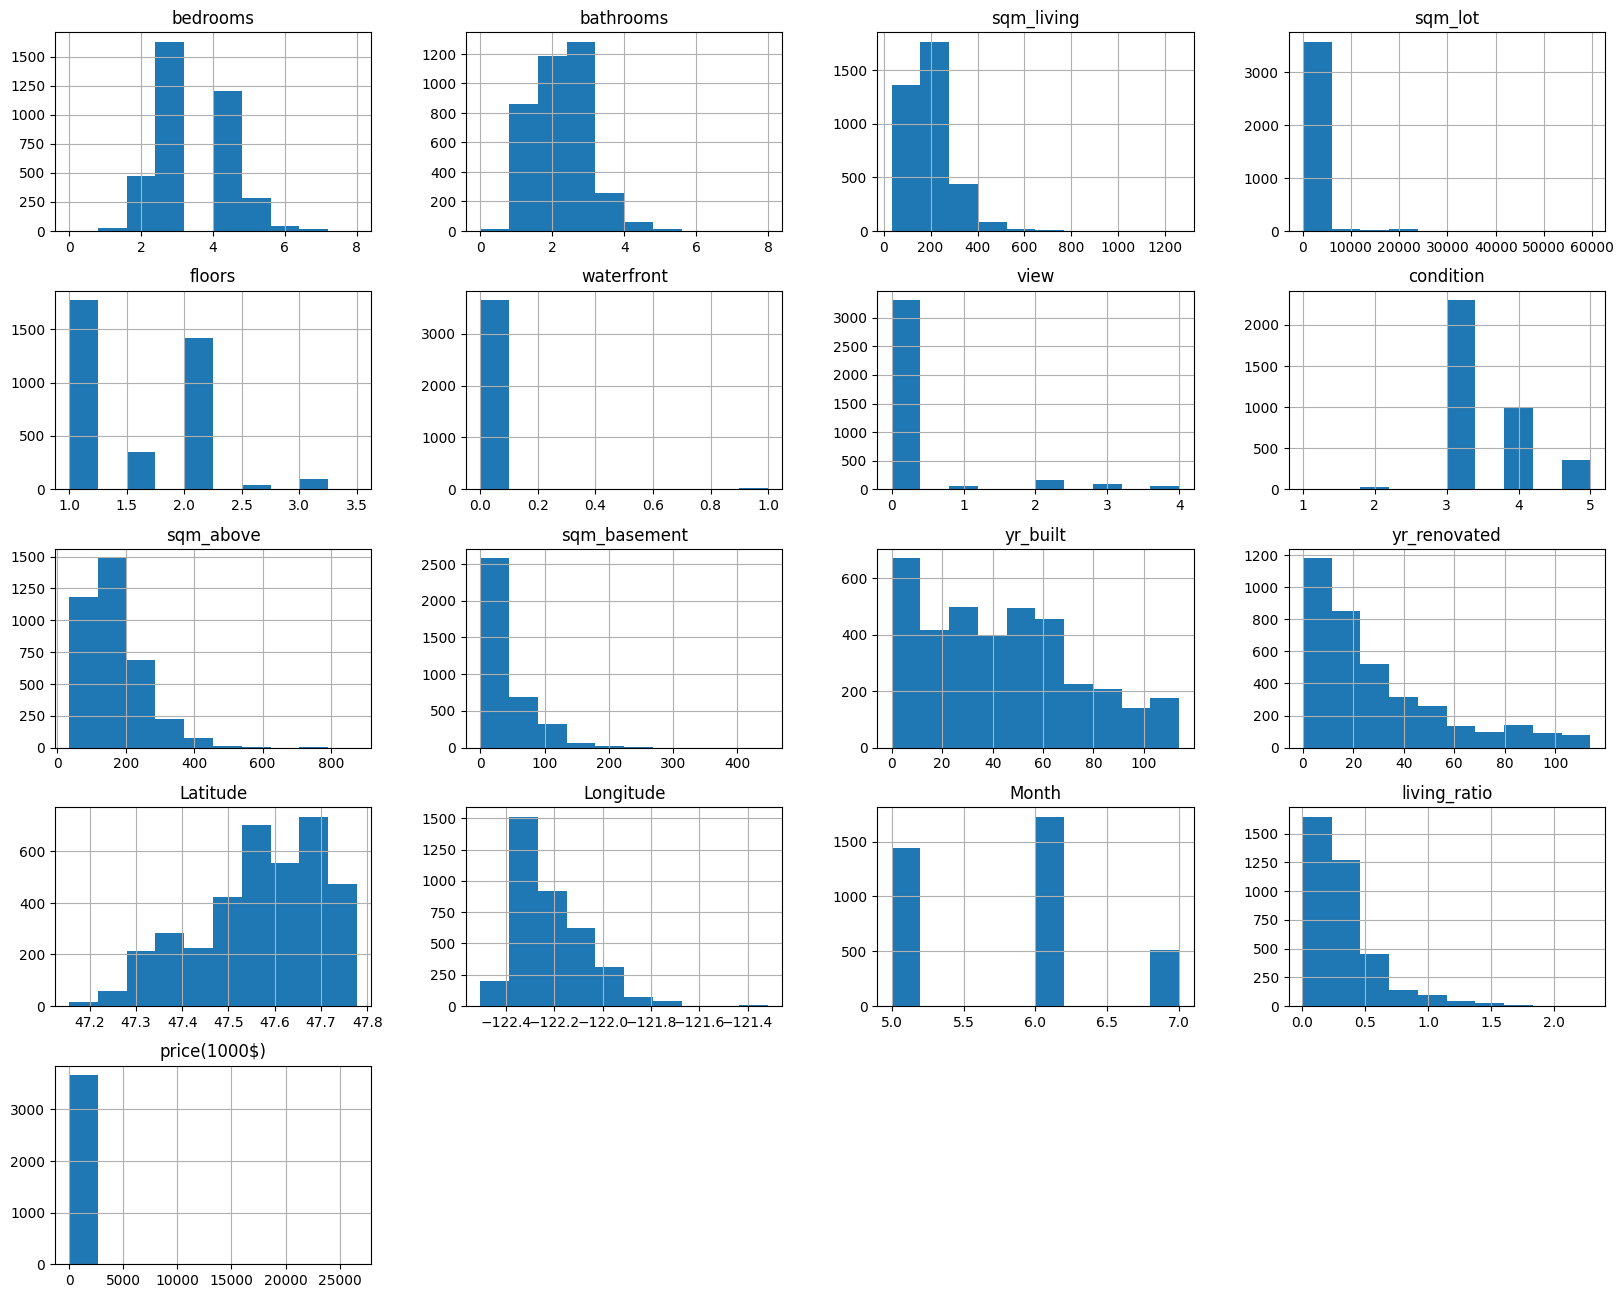

In [13]:
train_data.hist(figsize=(20, 16))

<Axes: >

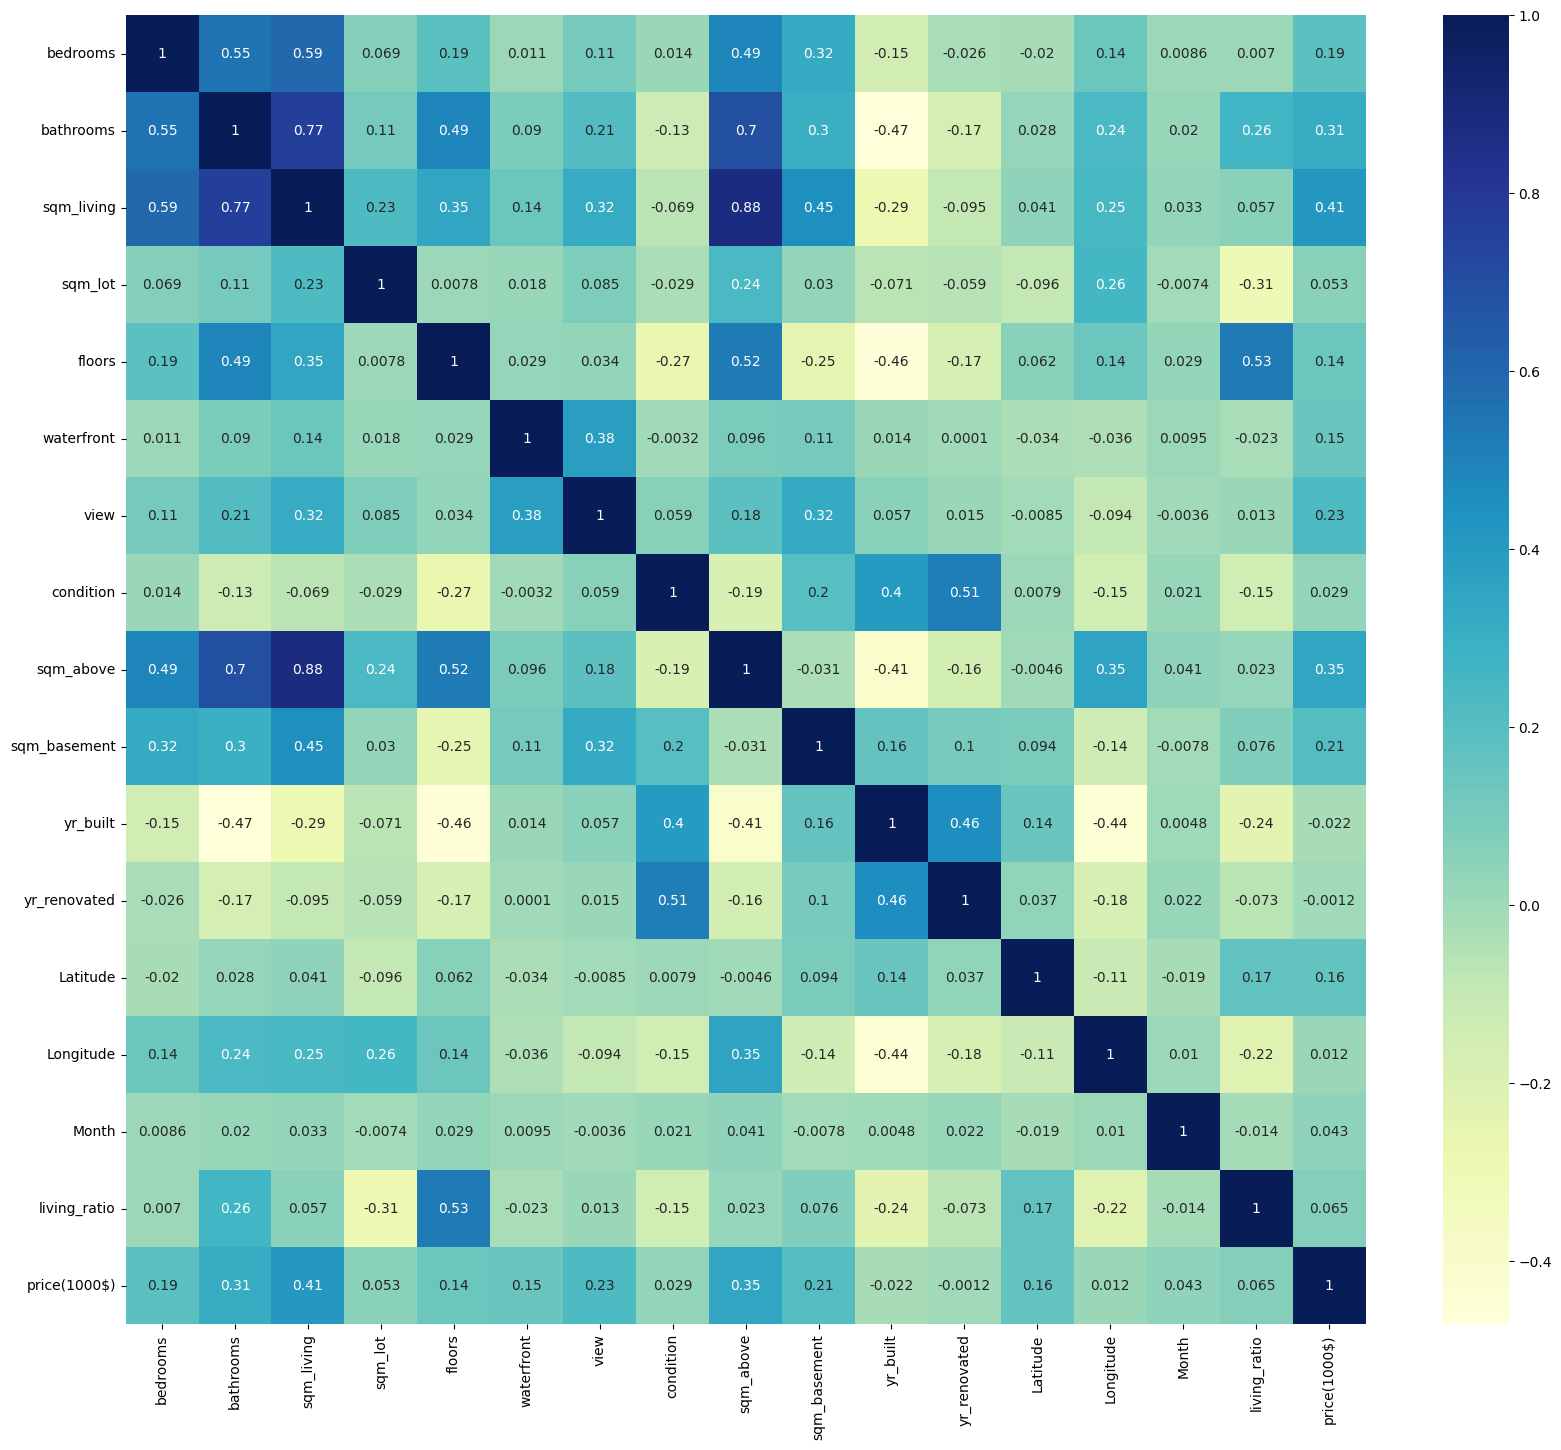

In [14]:
plt.figure(figsize=(20,17))
sns.heatmap(train_data.corr(numeric_only=True), annot = True, cmap="YlGnBu")

<Axes: xlabel='Latitude', ylabel='Longitude'>

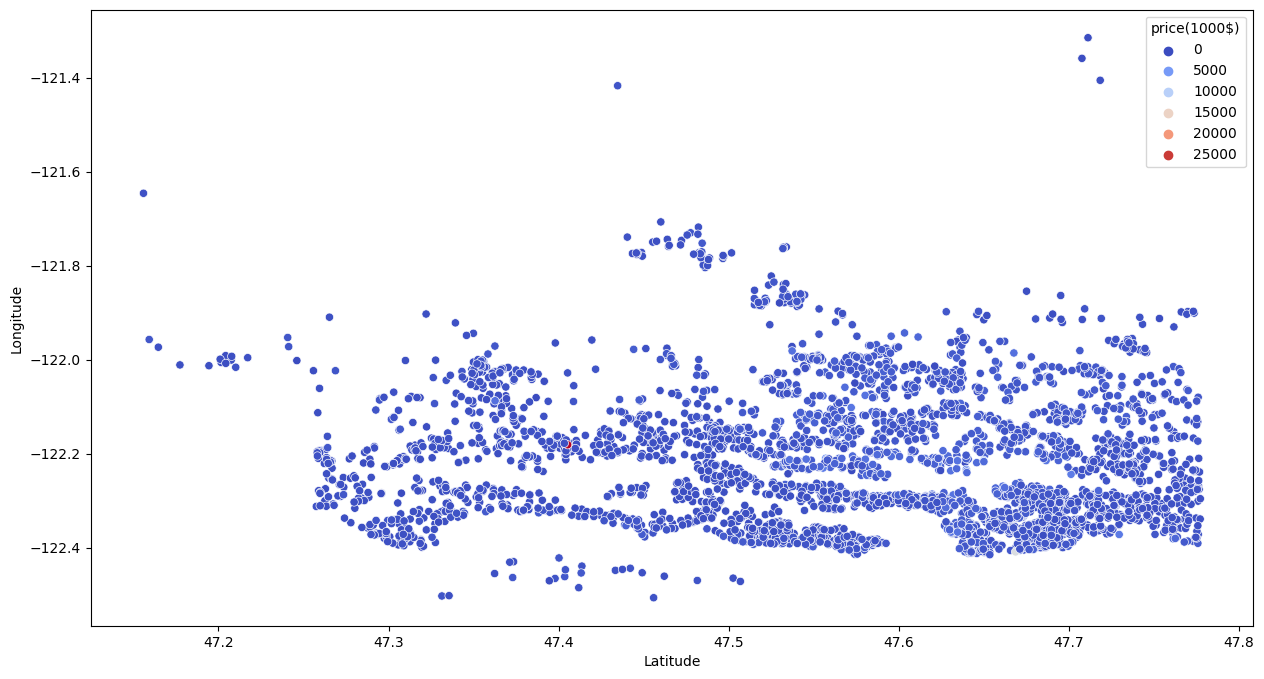

In [15]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Latitude', y='Longitude', data=train_data, hue='price(1000$)', palette='coolwarm')

## Modeling part
Begin trying to model using different algorithms
### Modeled separately using different standardized approaches
1. No standardization
2. StandardScaler
3. MinMaxScaler

In [16]:
# Standardized processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from prettytable import PrettyTable

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

X_train_non = X_train.copy()
X_train_std = std_scaler.fit_transform(X_train)
X_train_mm = mm_scaler.fit_transform(X_train)

X_test_non = X_test.copy()
X_test_std = std_scaler.transform(X_test)
X_test_mm = mm_scaler.transform(X_test)

In [17]:
# Using linear regression algorithm
from sklearn.linear_model import LinearRegression

lr_non = LinearRegression()
lr_std = LinearRegression()
lr_mm = LinearRegression()

lr_non.fit(X_train_non, y_train)
lr_std.fit(X_train_std, y_train)
lr_mm.fit(X_train_mm, y_train)

LinearRegression()

In [18]:
# Linear regression algorithm model Evaluation
lr_pred_non = lr_non.predict(X_test_non)
lr_pred_std = lr_std.predict(X_test_std)
lr_pred_mm = lr_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
lr_mse_non = mean_squared_error(y_test, lr_pred_non)
lr_mse_std = mean_squared_error(y_test, lr_pred_std)
lr_mse_mm =  mean_squared_error(y_test, lr_pred_mm)


# Compute MAE(Mean Absolute Error)
lr_mae_non = mean_absolute_error(y_test,lr_pred_non)
lr_mae_std = mean_absolute_error(y_test, lr_pred_std)
lr_mae_mm = mean_absolute_error(y_test, lr_pred_mm)


# Compute R(R-squared score)
lr_r2_non = r2_score(y_test, lr_pred_non)
lr_r2_std = r2_score(y_test, lr_pred_std)
lr_r2_mm = r2_score(y_test, lr_pred_mm)



table_lr = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_lr.add_row(['LR(no)', lr_mse_non, lr_mae_non, lr_r2_non])
table_lr.add_row(['LR(std)', lr_mse_std, lr_mae_std, lr_r2_std])
table_lr.add_row(['LR(mm)', lr_mse_mm, lr_mae_mm, lr_r2_mm])

print(table_lr)

+-----------+--------------------+--------------------+--------------------+
| Algorithm |        MSE         |        MAE         |         R2         |
+-----------+--------------------+--------------------+--------------------+
|   LR(no)  | 54221.48882871087  | 144.58960625621174 | 0.5055587517355006 |
|  LR(std)  | 54237.64140120907  | 144.64586567293426 | 0.5054114577699306 |
|   LR(mm)  | 54209.557856241096 | 144.57812099890782 | 0.5056675492814255 |
+-----------+--------------------+--------------------+--------------------+


In [19]:
# Using RandomForest algorithm
from sklearn.ensemble import RandomForestRegressor

rf_non = RandomForestRegressor()
rf_std = RandomForestRegressor()
rf_mm = RandomForestRegressor()

rf_non.fit(X_train_non, y_train)
rf_std.fit(X_train_std, y_train)
rf_mm.fit(X_train_mm, y_train)

RandomForestRegressor()

In [20]:
# Random forest algorithm model Evaluation
rf_pred_non = rf_non.predict(X_test_non)
rf_pred_std = rf_std.predict(X_test_std)
rf_pred_mm = rf_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
rf_mse_non = mean_squared_error(y_test, rf_pred_non)
rf_mse_std = mean_squared_error(y_test, rf_pred_std)
rf_mse_mm =  mean_squared_error(y_test, rf_pred_mm)


# Compute MAE(Mean Absolute Error)
rf_mae_non = mean_absolute_error(y_test,rf_pred_non)
rf_mae_std = mean_absolute_error(y_test, rf_pred_std)
rf_mae_mm = mean_absolute_error(y_test, rf_pred_mm)


# Compute R(R-squared score)
rf_r2_non = r2_score(y_test, rf_pred_non)
rf_r2_std = r2_score(y_test, rf_pred_std)
rf_r2_mm = r2_score(y_test, rf_pred_mm)



table_rf = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_rf.add_row(['RF(no)', rf_mse_non, rf_mae_non, rf_r2_non])
table_rf.add_row(['RF(std)', rf_mse_std, rf_mae_std, rf_r2_std])
table_rf.add_row(['RF(mm)', rf_mse_mm, rf_mae_mm, rf_r2_mm])

print(table_rf)

+-----------+-------------------+--------------------+--------------------+
| Algorithm |        MSE        |        MAE         |         R2         |
+-----------+-------------------+--------------------+--------------------+
|   RF(no)  | 43742.57546645296 | 102.33048802173913 | 0.6011150913937144 |
|  RF(std)  | 45374.01190258812 |  105.294874692029  | 0.5862381581819557 |
|   RF(mm)  | 41387.63103343602 | 103.61508869202899 | 0.6225896338713802 |
+-----------+-------------------+--------------------+--------------------+


In [21]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_non = DecisionTreeRegressor()
dt_std = DecisionTreeRegressor()
dt_mm = DecisionTreeRegressor()

dt_non.fit(X_train_non, y_train)
dt_std.fit(X_train_std, y_train)
dt_mm.fit(X_train_mm, y_train)

DecisionTreeRegressor()

In [22]:
# Decision Tree Regressor model Evaluation
dt_pred_non = dt_non.predict(X_test_non)
dt_pred_std = dt_std.predict(X_test_std)
dt_pred_mm = dt_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
dt_mse_non = mean_squared_error(y_test, dt_pred_non)
dt_mse_std = mean_squared_error(y_test, dt_pred_std)
dt_mse_mm =  mean_squared_error(y_test, dt_pred_mm)


# Compute MAE(Mean Absolute Error)
dt_mae_non = mean_absolute_error(y_test,dt_pred_non)
dt_mae_std = mean_absolute_error(y_test, dt_pred_std)
dt_mae_mm = mean_absolute_error(y_test, dt_pred_mm)


# Compute R(R-squared score)
dt_r2_non = r2_score(y_test, dt_pred_non)
dt_r2_std = r2_score(y_test, dt_pred_std)
dt_r2_mm = r2_score(y_test, dt_pred_mm)



table_dt = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_dt.add_row(['dt(no)', dt_mse_non, dt_mae_non, dt_r2_non])
table_dt.add_row(['dt(std)', dt_mse_std, dt_mae_std, dt_r2_std])
table_dt.add_row(['dt(mm)', dt_mse_mm, dt_mae_mm, dt_r2_mm])

print(table_dt)

+-----------+--------------------+--------------------+---------------------+
| Algorithm |        MSE         |        MAE         |          R2         |
+-----------+--------------------+--------------------+---------------------+
|   dt(no)  | 67499.66409388804  | 141.07870326086956 |  0.3844761755353314 |
|  dt(std)  | 227687.34523892062 | 156.9665663043478  | -1.0762619696704205 |
|   dt(mm)  | 66487.48904242936  | 139.11125326086957 |  0.3937061156700704 |
+-----------+--------------------+--------------------+---------------------+


In [23]:
# Support Vector Regressor
from sklearn.svm import SVR

svr_non = SVR()
svr_std = SVR()
svr_mm = SVR()

svr_non.fit(X_train_non, y_train)
svr_std.fit(X_train_std, y_train)
svr_mm.fit(X_train_mm, y_train)

SVR()

In [24]:
# Support Vector Regressor model Evaluation
svr_pred_non = svr_non.predict(X_test_non)
svr_pred_std = svr_std.predict(X_test_std)
svr_pred_mm = svr_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
svr_mse_non = mean_squared_error(y_test, svr_pred_non)
svr_mse_std = mean_squared_error(y_test, svr_pred_std)
svr_mse_mm =  mean_squared_error(y_test, svr_pred_mm)


# Compute MAE(Mean Absolute Error)
svr_mae_non = mean_absolute_error(y_test,svr_pred_non)
svr_mae_std = mean_absolute_error(y_test, svr_pred_std)
svr_mae_mm = mean_absolute_error(y_test, svr_pred_mm)


# Compute R(R-squared score)
svr_r2_non = r2_score(y_test, svr_pred_non)
svr_r2_std = r2_score(y_test, svr_pred_std)
svr_r2_mm = r2_score(y_test, svr_pred_mm)



table_svr = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_svr.add_row(['svr(no)', svr_mse_non, svr_mae_non, svr_r2_non])
table_svr.add_row(['svr(std)', svr_mse_std, svr_mae_std, svr_r2_std])
table_svr.add_row(['svr(mm)', svr_mse_mm, svr_mae_mm, svr_r2_mm])

print(table_svr)

+-----------+-------------------+--------------------+----------------------+
| Algorithm |        MSE        |        MAE         |          R2          |
+-----------+-------------------+--------------------+----------------------+
|  svr(no)  | 113790.9341241836 | 219.86457217367817 | -0.03765006688183958 |
|  svr(std) | 87409.04060838815 | 170.11880861409034 | 0.20292422650834663  |
|  svr(mm)  | 94060.13867628486 | 184.96386146716188 | 0.14227341624732137  |
+-----------+-------------------+--------------------+----------------------+


In [25]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr_non = GradientBoostingRegressor()
gbr_std = GradientBoostingRegressor()
gbr_mm = GradientBoostingRegressor()

gbr_non.fit(X_train_non, y_train)
gbr_std.fit(X_train_std, y_train)
gbr_mm.fit(X_train_mm, y_train)

GradientBoostingRegressor()

In [26]:
# Gradient Boosting Regressor model Evaluation
gbr_pred_non = gbr_non.predict(X_test_non)
gbr_pred_std = gbr_std.predict(X_test_std)
gbr_pred_mm = gbr_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
gbr_mse_non = mean_squared_error(y_test, gbr_pred_non)
gbr_mse_std = mean_squared_error(y_test, gbr_pred_std)
gbr_mse_mm =  mean_squared_error(y_test, gbr_pred_mm)


# Compute MAE(Mean Absolute Error)
gbr_mae_non = mean_absolute_error(y_test,gbr_pred_non)
gbr_mae_std = mean_absolute_error(y_test, gbr_pred_std)
gbr_mae_mm = mean_absolute_error(y_test, gbr_pred_mm)


# Compute R(R-squared score)
gbr_r2_non = r2_score(y_test, gbr_pred_non)
gbr_r2_std = r2_score(y_test, gbr_pred_std)
gbr_r2_mm = r2_score(y_test, gbr_pred_mm)



table_gbr = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_gbr.add_row(['gbr(no)', gbr_mse_non, gbr_mae_non, gbr_r2_non])
table_gbr.add_row(['gbr(std)', gbr_mse_std, gbr_mae_std, gbr_r2_std])
table_gbr.add_row(['gbr(mm)', gbr_mse_mm, gbr_mae_mm, gbr_r2_mm])

print(table_gbr)

+-----------+--------------------+--------------------+----------------------+
| Algorithm |        MSE         |        MAE         |          R2          |
+-----------+--------------------+--------------------+----------------------+
|  gbr(no)  | 91355.63211481765  | 121.37913845387533 |  0.1669355867092157  |
|  gbr(std) | 118348.02706142301 | 123.23053845522305 | -0.07920581846704677 |
|  gbr(mm)  | 118413.0902592336  | 123.4009755216253  | -0.07979912435805936 |
+-----------+--------------------+--------------------+----------------------+


In [27]:
# XGboost(eXtreme Gradient Boosting) algorithm
import xgboost as xgb

xgb_non = xgb.XGBRegressor(objective ='reg:squarederror')
xgb_std = xgb.XGBRegressor(objective ='reg:squarederror')
xgb_mm = xgb.XGBRegressor(objective ='reg:squarederror')

xgb_non.fit(X_train_non, y_train)
xgb_std.fit(X_train_std, y_train)
xgb_mm.fit(X_train_mm, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [28]:
# XGboost model Evaluation
xgb_pred_non = xgb_non.predict(X_test_non)
xgb_pred_std = xgb_std.predict(X_test_std)
xgb_pred_mm = xgb_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
xgb_mse_non = mean_squared_error(y_test, xgb_pred_non)
xgb_mse_std = mean_squared_error(y_test, xgb_pred_std)
xgb_mse_mm =  mean_squared_error(y_test, xgb_pred_mm)


# Compute MAE(Mean Absolute Error)
xgb_mae_non = mean_absolute_error(y_test,xgb_pred_non)
xgb_mae_std = mean_absolute_error(y_test, xgb_pred_std)
xgb_mae_mm = mean_absolute_error(y_test, xgb_pred_mm)


# Compute R(R-squared score)
xgb_r2_non = r2_score(y_test, xgb_pred_non)
xgb_r2_std = r2_score(y_test, xgb_pred_std)
xgb_r2_mm = r2_score(y_test, xgb_pred_mm)



table_xgb = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_xgb.add_row(['xgb(no)', xgb_mse_non, xgb_mae_non, xgb_r2_non])
table_xgb.add_row(['xgb(std)', xgb_mse_std, xgb_mae_std, xgb_r2_std])
table_xgb.add_row(['xgb(mm)', xgb_mse_mm, xgb_mae_mm, xgb_r2_mm])

print(table_xgb)

+-----------+--------------------+--------------------+---------------------+
| Algorithm |        MSE         |        MAE         |          R2         |
+-----------+--------------------+--------------------+---------------------+
|  xgb(no)  | 59298.51304895609  | 111.94815558080258 | 0.45926179001138956 |
|  xgb(std) | 59679.60067887203  | 112.23682040730353 |  0.4557866836005522 |
|  xgb(mm)  | 59926.603274273104 | 112.4514867904663  | 0.45353428747066193 |
+-----------+--------------------+--------------------+---------------------+


In [33]:
# Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_non = Sequential()
nn_std = Sequential()
nn_mm = Sequential()


nn_non.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn_non.add(Dense(32, activation='relu'))
nn_non.add(Dense(1, activation='linear'))  # The output layer, since it is a regression problem, has a linear activation function

nn_std.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn_std.add(Dense(32, activation='relu'))
nn_std.add(Dense(1, activation='linear')) 

nn_mm.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn_mm.add(Dense(32, activation='relu'))
nn_mm.add(Dense(1, activation='linear'))  

nn_non.compile(optimizer='adam', loss='mean_squared_error')  # Using MSE as a loss function
nn_std.compile(optimizer='adam', loss='mean_squared_error')
nn_mm.compile(optimizer='adam', loss='mean_squared_error')

nn_non.fit(X_train_non, y_train, epochs=100, batch_size=32, validation_split=0.2)
nn_std.fit(X_train_std, y_train, epochs=100, batch_size=32, validation_split=0.2)
nn_mm.fit(X_train_mm, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
92/92 [==============================] - 0s 2ms/step - loss: 337833.2188 - val_loss: 1277307.0000
Epoch 2/100
92/92 [==============================] - 0s 954us/step - loss: 99184.2500 - val_loss: 1211772.6250
Epoch 3/100
92/92 [==============================] - 0s 980us/step - loss: 87599.9844 - val_loss: 1210025.5000
Epoch 4/100
92/92 [==============================] - 0s 1ms/step - loss: 84671.6406 - val_loss: 1209845.6250
Epoch 5/100
92/92 [==============================] - 0s 1ms/step - loss: 82376.4922 - val_loss: 1209838.8750
Epoch 6/100
92/92 [==============================] - 0s 1ms/step - loss: 79244.0703 - val_loss: 1210574.2500
Epoch 7/100
92/92 [==============================] - 0s 1ms/step - loss: 80536.1484 - val_loss: 1209776.6250
Epoch 8/100
92/92 [==============================] - 0s 1ms/step - loss: 77323.4531 - val_loss: 1215744.8750
Epoch 9/100
92/92 [==============================] - 0s 1ms/step - loss: 78087.2891 - val_loss: 1213205.1250
Epoch 10/100
9

In [34]:
nn_mse_non = nn_non.evaluate(X_test_non, y_test)
nn_mse_std = nn_non.evaluate(X_test_std, y_test)
nn_mse_mm = nn_non.evaluate(X_test_mm, y_test)


table_nn = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_nn.add_row(['nn(no)', nn_mse_non, None, None])
table_nn.add_row(['nn(std)', nn_mse_std, None, None])
table_nn.add_row(['nn(mm)', nn_mse_mm, None, None])

print(table_nn)

29/29 [==============================] - 0s 854us/step - loss: 398317.1250
+-----------+----------------+------+------+
| Algorithm |      MSE       | MAE  |  R2  |
+-----------+----------------+------+------+
|   nn(no)  | 59557.66796875 | None | None |
|  nn(std)  |    384101.5    | None | None |
|   nn(mm)  |   398317.125   | None | None |
+-----------+----------------+------+------+
